## Objectives

- Handle missing values
- Correct data format
- Standardize and normalize data

## Data description

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Information: https://archive.ics.uci.edu/ml/datasets/Automobile

### Data set overview

This data set with 205 rows and 26 columns.
- 15 numerical
- 1 integer
- 10 categorical

It consists of three types of entities: (1) its assigned insurance risk rating, (2) its normalized losses in use as compared to other cars, (3) the specification of an auto in terms of various characteristics.

1. The first attribute "sympoling" corresponds to degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

2. The second attribute “normalized-losses” is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year. The values range from 65 to 256.

3. And other attributes are the specification of an auto in terms of various characteristics.

"price" is target value that we want to predict.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Data dictionary

1. symboling:           -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:   continuous from 65 to 256.
3. make:                alfa-romero, audi, bmw, chevrolet, dodge, honda,
                        isuzu, jaguar, mazda, mercedes-benz, mercury,
                        mitsubishi, nissan, peugot, plymouth, porsche,
                        renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:           diesel, gas.
5. aspiration:          std, turbo.
6. num-of-doors:        four, two.
7. body-style:          hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:        4wd, fwd, rwd.
9. engine-location:     front, rear.
10. wheel-base:         continuous from 86.6 120.9.
11. length:             continuous from 141.1 to 208.1.
12. width:              continuous from 60.3 to 72.3.
13. height:             continuous from 47.8 to 59.8.
14. curb-weight:        continuous from 1488 to 4066.
15. engine-type:        dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:   eight, five, four, six, three, twelve, two.
17. engine-size:        continuous from 61 to 326.
18. fuel-system:        1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:               continuous from 2.54 to 3.94.
20. stroke:             continuous from 2.07 to 4.17.
21. compression-ratio:  continuous from 7 to 23.
22. horsepower:         continuous from 48 to 288.
23. peak-rpm:           continuous from 4150 to 6600.
24. city-mpg:           continuous from 13 to 49.
25. highway-mpg:        continuous from 16 to 54.
26. price:              continuous from 5118 to 45400.

### Import libraries and load data

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./data/auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data formatting

In this dataset, missing values denoted by "?". So we replace them by `numpy.nan`.

In [4]:
df.replace("?", np.nan, inplace=True)

**Categorical columns (10 columns)** is expected to be **object** type:

'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'.

and **numerical columns (16 columns)** is expected to be **float/int** type:

'symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'.

Data type of each column in the dataset

In [5]:
columns_by_dtype = df.columns.groupby(df.dtypes) # dict {dtype: [colname]}
for key in columns_by_dtype:
    print('%s have %i columns:' % (key, columns_by_dtype[key].size))
    print(columns_by_dtype[key].values)

int64 have 5 columns:
['symboling' 'curb-weight' 'engine-size' 'city-mpg' 'highway-mpg']
float64 have 5 columns:
['wheel-base' 'length' 'width' 'height' 'compression-ratio']
object have 16 columns:
['normalized-losses' 'make' 'fuel-type' 'aspiration' 'num-of-doors'
 'body-style' 'drive-wheels' 'engine-location' 'engine-type'
 'num-of-cylinders' 'fuel-system' 'bore' 'stroke' 'horsepower' 'peak-rpm'
 'price']


Some things don't seem right. Let's correct it!
- convert to float: 'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'.

In [6]:
cols_to_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols_to_float] = df[cols_to_float].astype(float, errors='raise')

In [7]:
df.dtypes.value_counts()

float64    11
object     10
int64       5
dtype: int64

Checking duplicated rows

In [8]:
df.duplicated().sum()

0

### Missing values

Missing values by columns

In [9]:
missing_amount = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/len(df.index)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_amount, percent], axis=1, keys=['missing_amount', 'percent (%)'])
missing_data

,missing_amount,percent (%)
normalized-losses,41,20.00000
price,4,1.95122
stroke,4,1.95122
bore,4,1.95122
peak-rpm,2,0.97561
num-of-doors,2,0.97561
horsepower,2,0.97561
engine-type,0,0.00000
highway-mpg,0,0.00000
city-mpg,0,0.00000


In the dataset
- none of the columns are empty enough to drop entirely.
- "price" has 4 missing values. "price" is what we want to predict. Any data entry without "price" data cannot be used for prediction; therefore any row without "price" will be removed.
- "normalized-losses" on top with 41 (20%) of missing values. So we deep dive last.
- Other columns have insignificantly missing values. So we can apply a simple imputation method like mean/median/mode imputation.

#### Handling missing values

**price**

Drop whole rows with missing "price" values

In [10]:
# drop whole rows with missing "price" values
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

**Other columns**

Replace by mean:

- "stroke": 4 missing data
- "bore": 4 missing data
- "horsepower": 2 missing data
- "peak-rpm": 2 missing data

Replace by mode:

- "num-of-doors": 2 missing data

In [11]:
replace_by_mean = ['stroke', 'bore', 'horsepower', 'peak-rpm']
for col in replace_by_mean:
    df[col].replace(np.nan, df[col].astype(float).mean(), inplace=True)

In [12]:
df['num-of-doors'].replace(np.nan, df['num-of-doors'].mode()[0], inplace=True)

**"normalized-losses"**

We don't have any clues that data is systematically missing. This leads to assuming that data missing at random. To be more certain of this assumption, consider the missing dataset as a sample taken from the original dataset and compare distributions of the missing dataset with the original distributions.

In this case, there is no significant difference between the distributions. Thus, the random missingness is supported.

##### Original distribution of variables

Categorical variables

In [15]:
cate_df = df.select_dtypes(include='object')

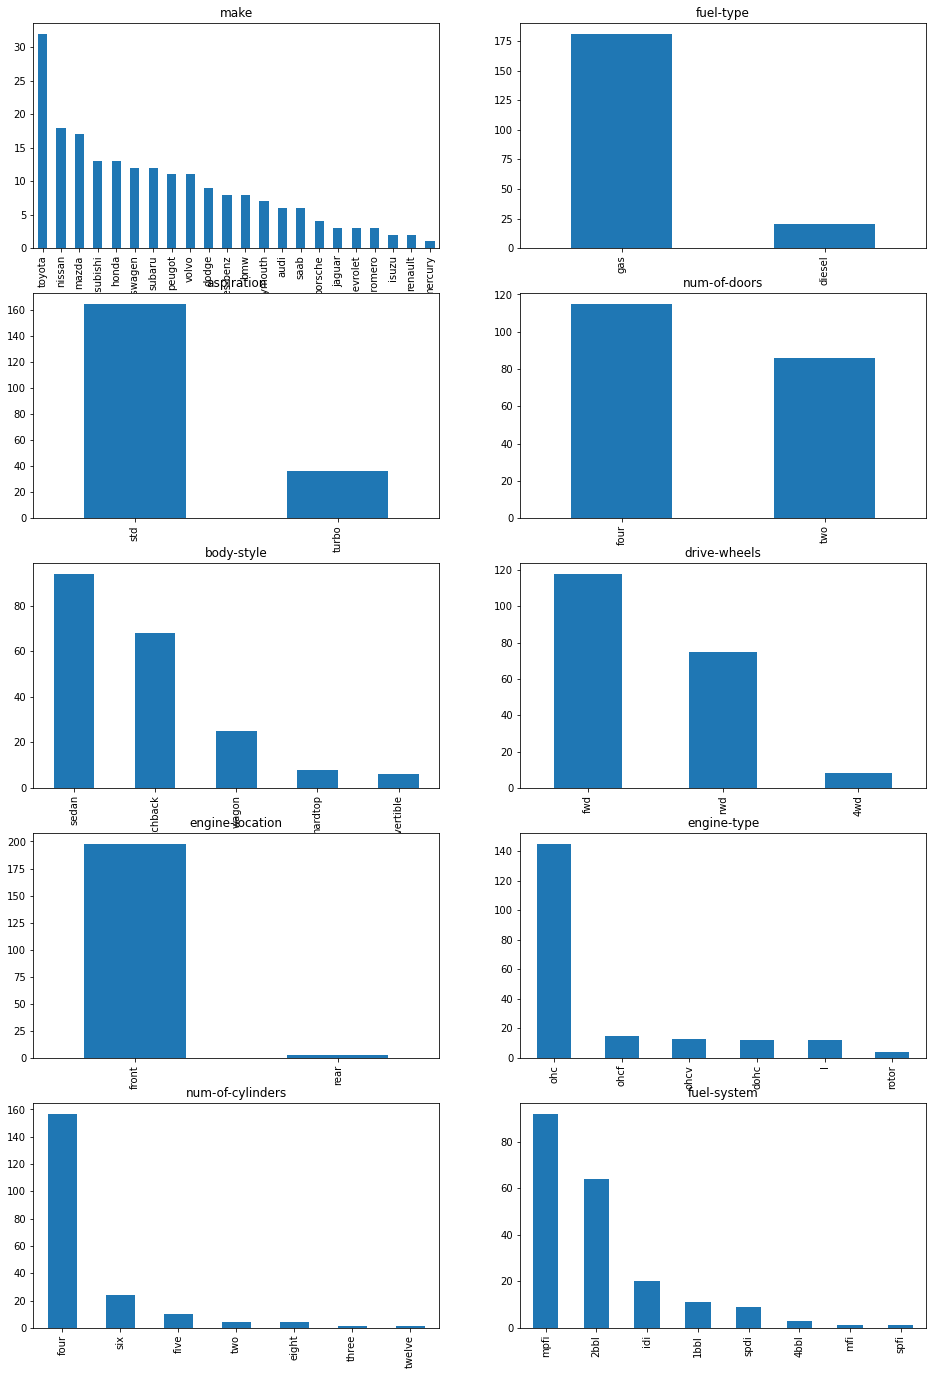

In [13]:
fig, ax = plt.subplots(5, 2, figsize=(16, 24))
for i, cate_col in enumerate(list(cate_df.columns)):
    df[cate_col].value_counts().plot(kind="bar", ax=ax.ravel()[i])
    ax.ravel()[i].set_title(cate_col)

Numerical variables

In [16]:
num_df = df.select_dtypes(exclude='object')

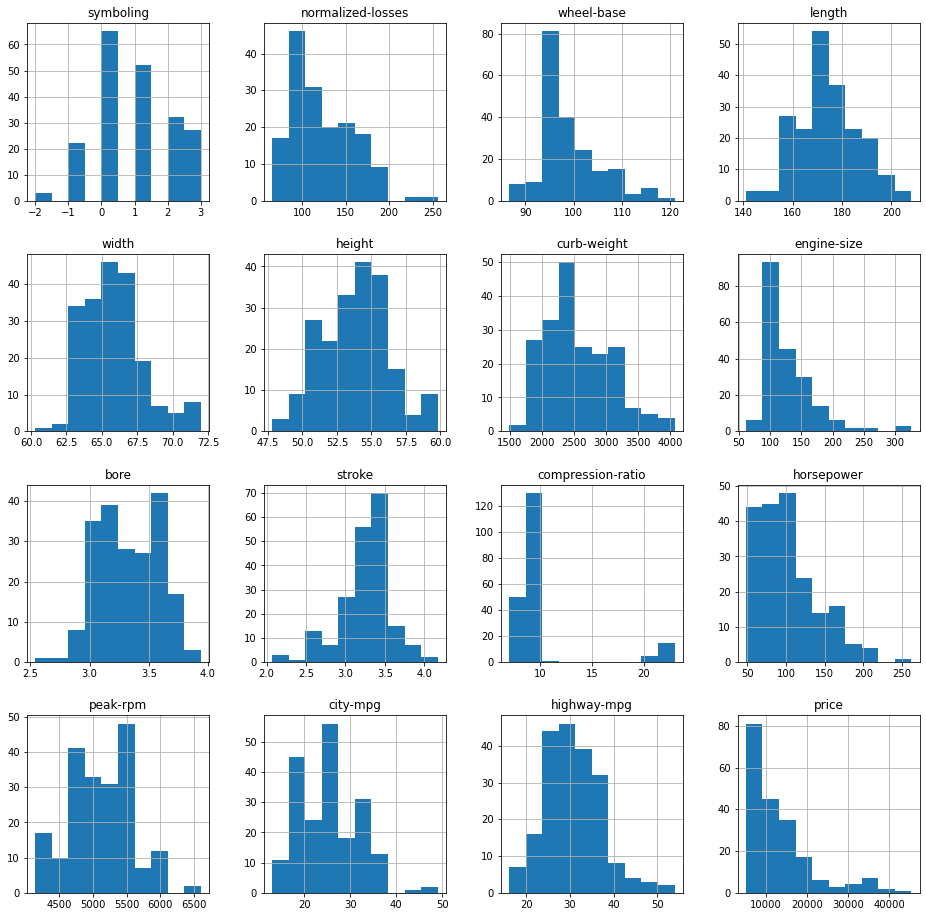

In [17]:
num_df.hist(figsize=(16,16));

##### Distribution of missing "normalized-losses" variables

Categorical variables

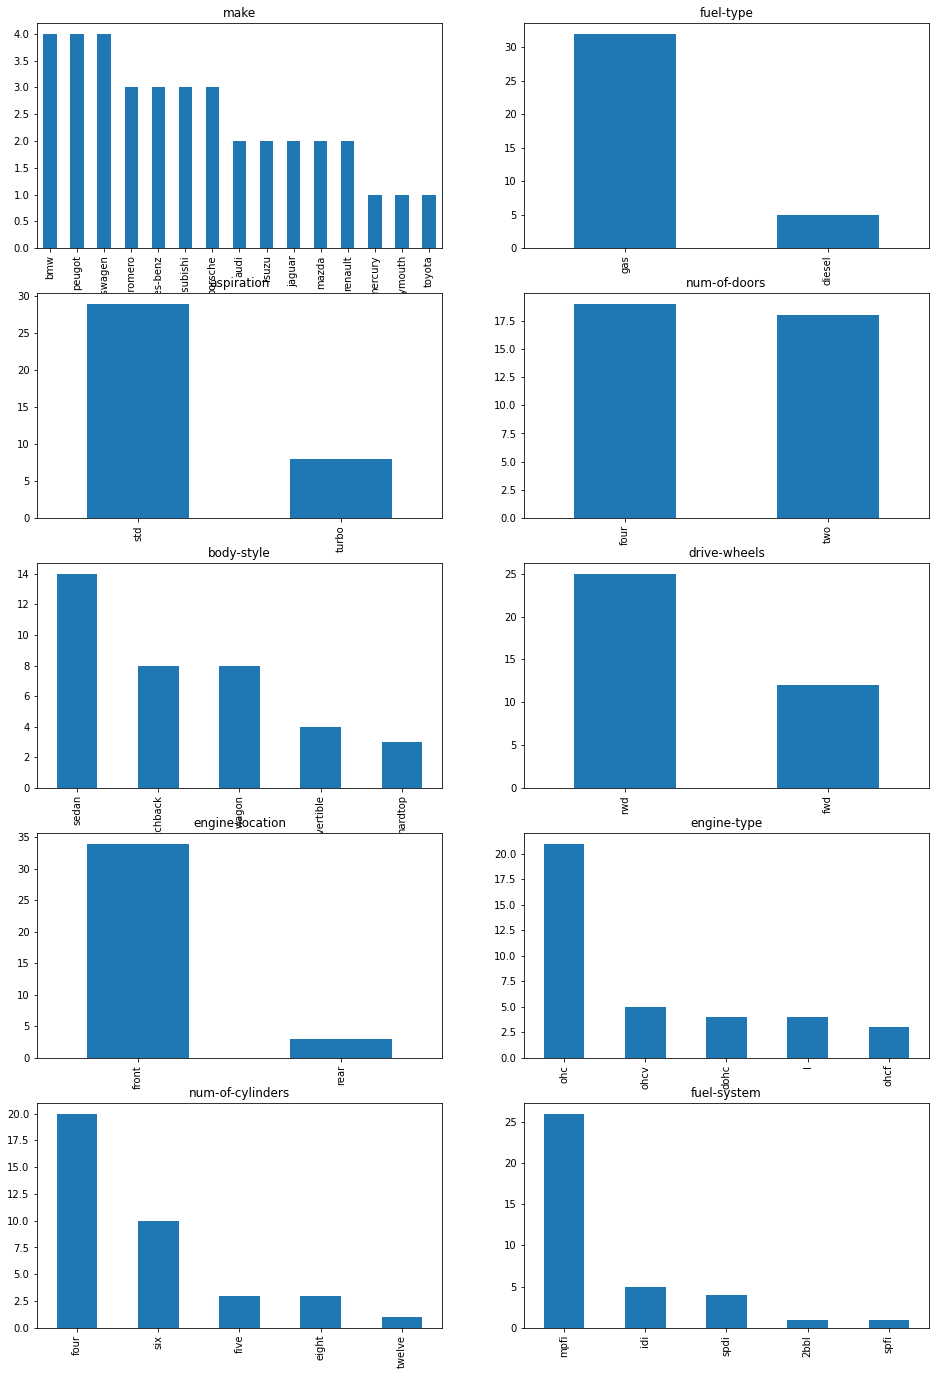

In [19]:
df_missing = df[df.isna().any(axis=1)]
cate_df_missing = df_missing.select_dtypes(include='object')
fig, ax = plt.subplots(5, 2, figsize=(16, 24))
for i, cate_col in enumerate(list(cate_df_missing.columns)):
    df_missing[cate_col].value_counts().plot(kind="bar", ax=ax.ravel()[i])
    ax.ravel()[i].set_title(cate_col)

Numerical variables

In [18]:
df_missing.hist(figsize=(16,16));

NameError: name 'df_missing' is not defined

Categorical variables

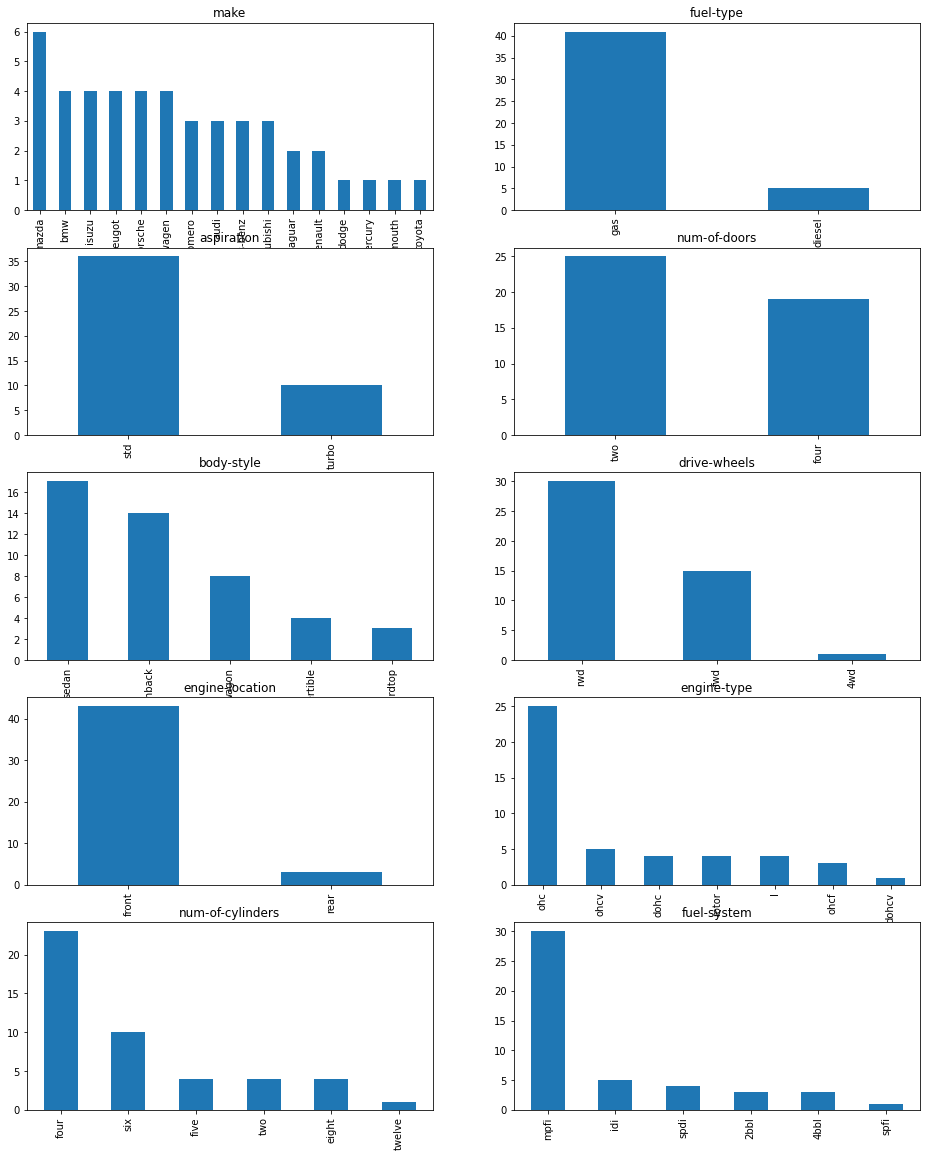

In [ ]:
df_missing = df[df.isna().any(axis=1)]
cate_df_missing = df_missing.select_dtypes(include='object')
fig, ax = plt.subplots(5, 2, figsize=(16, 24))
for i, cate_col in enumerate(list(cate_df_missing.columns)):
    df_missing[cate_col].value_counts().plot(kind="bar", ax=ax.ravel()[i])
    ax.ravel()[i].set_title(cate_col)

Numerical variables

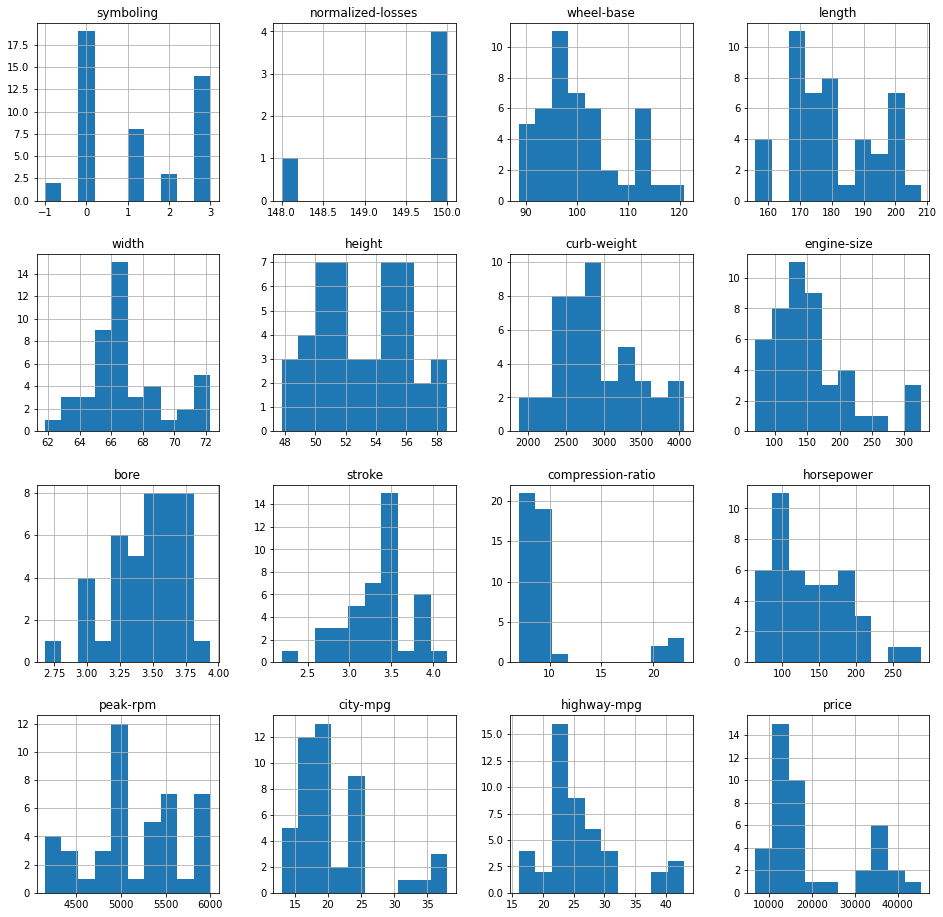

In [ ]:
df_missing.hist(figsize=(16,16));

##### Impute missing values by K-nearest neighbors

Pros:
- preserves the original shape of the distribution instead of distorting it like when using simple imputations (e.g. random, mean/median/mode).
- has not many strict assumptions that take time to examine like the regression method.

Cons:
- works by computing over the whole completed-case dataset for every single imputation but this dataset is quite small.

**How does it work?**

Find k nearest completed samples that don't have missing values. These samples are called "neighbors". The "nearest" is determined based on the euclidean distance. Fill in all missing values using the average of these completed neighbors.

Take a look at the original distribution of "normalized-losses"

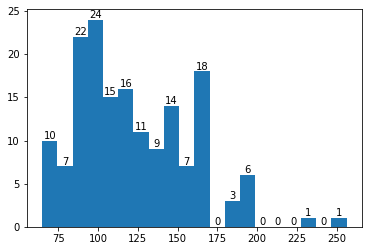

In [15]:
counts, edges, bars = plt.hist(df['normalized-losses'].astype(float), bins=20)
plt.bar_label(bars);

KNN imputation for nomalized-losses

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [18]:
num_df = df.select_dtypes(exclude=['object'])

# standardizing numerical variables exclude normalized-losses
scaler = StandardScaler()
num_arr_scaled = scaler.fit_transform(num_df.loc[:, num_df.columns != 'normalized-losses'])

# insert normalized-losses to X_scale
num_arr_scaled = np.insert(num_arr_scaled, 1, df['normalized-losses'].values, axis=1)

# KNN imputation for normalized-losses
imputer = KNNImputer(n_neighbors=5, weights='distance')
num_arr_scaled_knnimp = imputer.fit_transform(num_arr_scaled)

# fill missing normalized-lossed by KNN-imputed values
df['normalized-losses'] = df['normalized-losses'].combine_first(pd.Series(num_arr_scaled_knnimp[:,1]))

Distribution of normalized-losses after KNN imputation

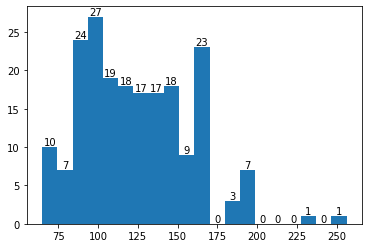

In [19]:
counts, edges, bars = plt.hist(df['normalized-losses'], bins=20)
plt.bar_label(bars);